<a href="https://colab.research.google.com/github/Amritasha/ML/blob/main/ml1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

Mounted at /content/gdrive


In [4]:
from fastbook import *
from fastai.vision.widgets import *

In [5]:
key = os.environ.get('AZURE_SEARCH_KEY', '3e9826dc100d4a2f86586ae4929ffe03')

In [6]:
search_images_bing

<function fastbook.search_images_bing>

In [7]:
animal_types = 'dog','cat'
path = Path('animal')

In [8]:
if not path.exists():
    path.mkdir()
    for o in animal_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} animal')
        download_images(dest, urls=results.attrgot('contentUrl'))

In [9]:
fns = get_image_files(path)
fns

(#277) [Path('animal/cat/00000126.jpg'),Path('animal/cat/00000071.jpg'),Path('animal/cat/00000046.jpg'),Path('animal/cat/00000003.jpg'),Path('animal/cat/00000026.jpg'),Path('animal/cat/00000018.jpg'),Path('animal/cat/00000144.jpg'),Path('animal/cat/00000094.jpg'),Path('animal/cat/00000053.jpg'),Path('animal/cat/00000012.jpg')...]

In [10]:
failed = verify_images(fns)
failed

(#5) [Path('animal/cat/00000056.jpg'),Path('animal/cat/00000066.jpeg'),Path('animal/cat/00000075.jpg'),Path('animal/dog/00000126.jpg'),Path('animal/dog/00000015.jpg')]

In [11]:
failed.map(Path.unlink);

In [12]:
animal = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [13]:
dls = animal.dataloaders(path)

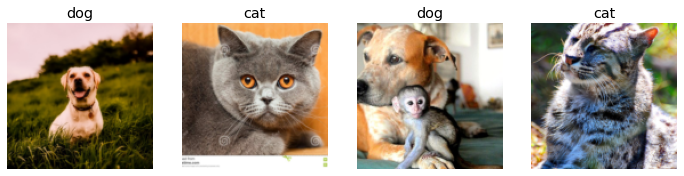

In [14]:
dls.valid.show_batch(max_n=4, nrows=1)

In [16]:
animal = animal.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = animal.dataloaders(path)

In [17]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.049454,1.261913,0.370370,00:14


epoch,train_loss,valid_loss,error_rate,time
0,0.364653,0.479388,0.166667,00:15
1,0.291137,0.253799,0.111111,00:15
2,0.251709,0.287712,0.129630,00:15
3,0.226985,0.308513,0.129630,00:15


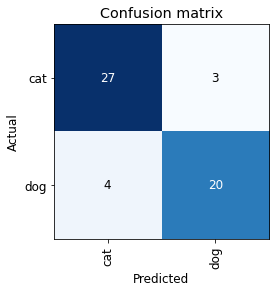

In [18]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

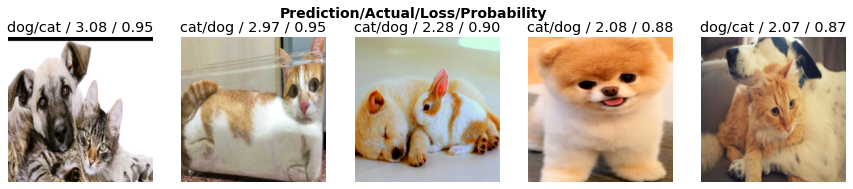

In [19]:
interp.plot_top_losses(5, nrows=1)

In [20]:
learn34 = cnn_learner(dls, resnet34, metrics=error_rate)
learn34.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,0.641249,0.779822,0.277778,00:15


epoch,train_loss,valid_loss,error_rate,time
0,0.356969,0.338723,0.148148,00:16
1,0.286970,0.286457,0.074074,00:16
2,0.250427,0.362983,0.074074,00:16
3,0.218602,0.384157,0.092593,00:15


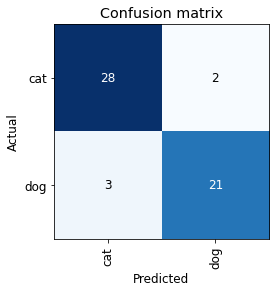

In [21]:
interp34 = ClassificationInterpretation.from_learner(learn34)
interp34.plot_confusion_matrix()

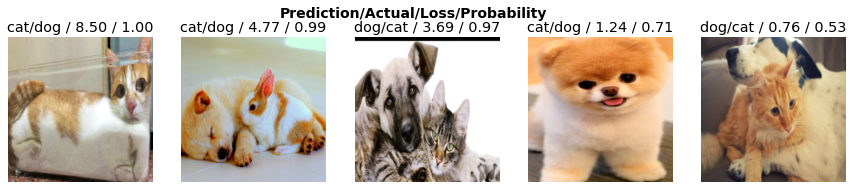

In [22]:
interp34.plot_top_losses(5, nrows=1)